0

 ***
Average training accuracy: 0.882
Average test accuracy: 0.866
for C = -1.60
for gamma = 0.10

 ***
Average training accuracy: 0.897
Average test accuracy: 0.875
for C = -1.60
for gamma = 0.20

 ***
Average training accuracy: 0.909
Average test accuracy: 0.885
for C = -1.60
for gamma = 0.30

 ***
Average training accuracy: 0.921
Average test accuracy: 0.892
for C = -1.60
for gamma = 0.40

 ***
Average training accuracy: 0.932
Average test accuracy: 0.898
for C = -1.60
for gamma = 0.50
1

 ***
Average training accuracy: 0.882
Average test accuracy: 0.866
for C = -1.50
for gamma = 0.10

 ***
Average training accuracy: 0.897
Average test accuracy: 0.875
for C = -1.50
for gamma = 0.20

 ***
Average training accuracy: 0.909
Average test accuracy: 0.885
for C = -1.50
for gamma = 0.30

 ***
Average training accuracy: 0.921
Average test accuracy: 0.892
for C = -1.50
for gamma = 0.40

 ***
Average training accuracy: 0.932
Average test accuracy: 0.898
for C = -1.50
for gamma = 0.50
2

 **

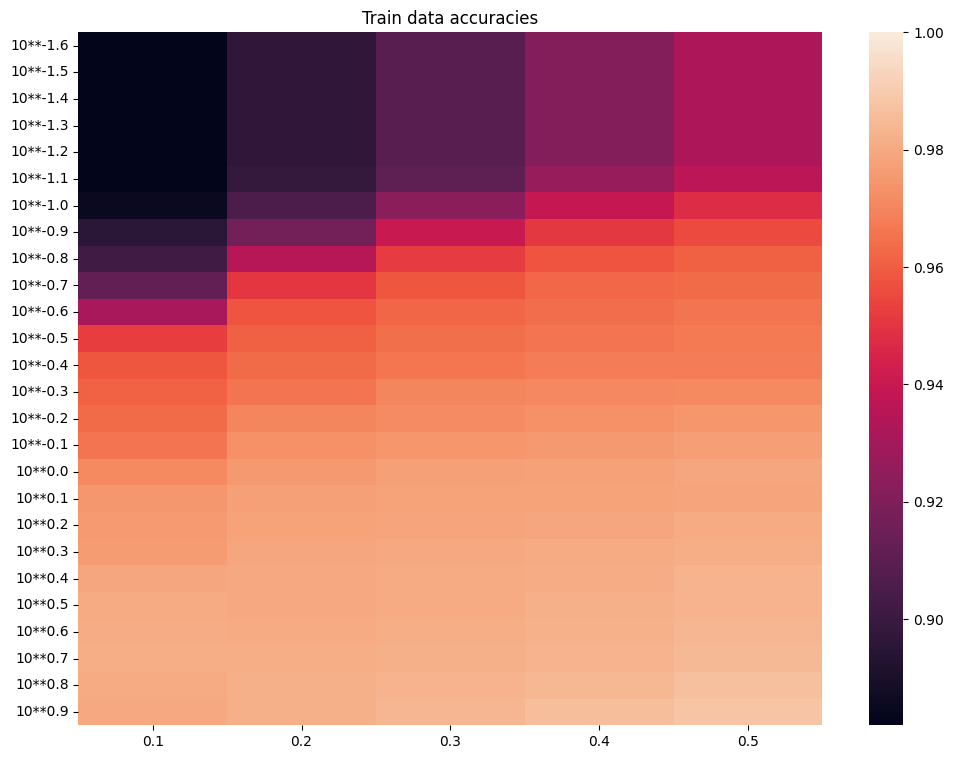

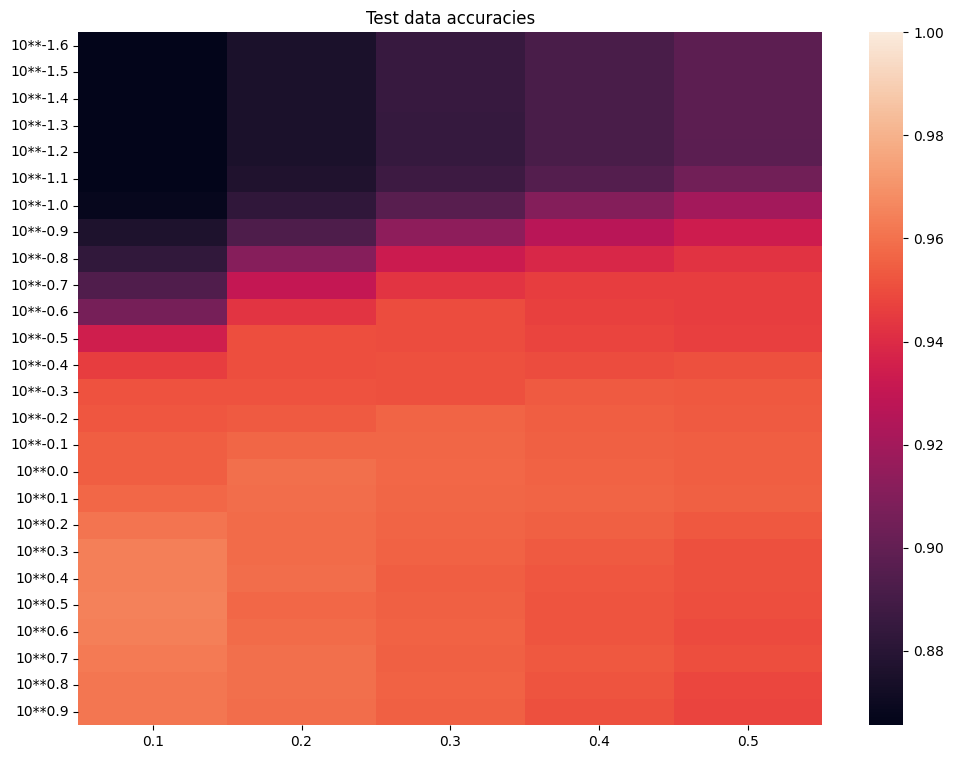

Best parameters for test data:
C = 0.50
gamma = 0.10
with accuracy: 0.964


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.svm import SVC

data = datasets.load_iris()
X = data.data
y = data.target

#==============================================================================
# Run loops across C, gamma and random_state of train_test_split for different
# combinations of parameters of SVC
#==============================================================================

# Set ranges for C and gamma
params_C = np.arange(-1.6, 1, 0.1)
params_gamma = np.arange(0.1, 0.6, 0.1)

# Collect results in numpy arrays, one for train, one for test
accArr_train = np.zeros((len(params_C), len(params_gamma)))
accArr_test = np.zeros((len(params_C), len(params_gamma)))

# Loop over increasing values of C
for c_ind, c in enumerate(params_C):
    print(c_ind)

    # Loop over increasing values of gamma
    for gamma_ind, gamma_val in enumerate(params_gamma):

        # Loop over increasing values of random_state of train_test_split
        accTrain_list = []
        accTest_list = []
        for rs in range(2, 102):

            # Split data into training and test data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=rs, stratify=y)

            # Initialise and fit scaler
            sc = StandardScaler()
            sc.fit(X_train)

            # Transform (scale) both X_train and X_test with mean and STD
            # from training data
            X_train_sc = sc.transform(X_train)
            X_test_sc = sc.transform(X_test)

            # Initialise and train SVC with specific values for C and gamma
            SVC_rbf = SVC(kernel='rbf', C=10.**c,
                          gamma=gamma_val, random_state=1)
            SVC_rbf.fit(X_train_sc, y_train)

            # Compute train accuracy and collect in list
            train_acc = SVC_rbf.score(X_train_sc, y_train)
            accTrain_list.append(train_acc)

            # Compute test accuracy and collect in list
            test_acc = SVC_rbf.score(X_test_sc, y_test)
            accTest_list.append(test_acc)


        # Compute average train and test accuracies across many splits
        accTrain_average = np.mean(accTrain_list)
        accTest_average = np.mean(accTest_list)

        # Print results on screen
        print('\n ***')
        print('Average training accuracy: {0:.3f}'.format(accTrain_average))
        print('Average test accuracy: {0:.3f}'.format(accTest_average))
        print('for C = {0:.2f}'.format(c))
        print('for gamma = {0:.2f}'.format(gamma_val))

        # Fill inn train and test accuracies in respective arrays
        accArr_train[c_ind, gamma_ind] = accTrain_average
        accArr_test[c_ind, gamma_ind] = accTest_average


# =============================================================================
# Plot heat maps of train and test accuracies
# =============================================================================

# Create row names for heat map
rowNames = ['10**{0:3.1f}'.format(c) for c in params_C]

# Create column names for heat map
colNames = ['{0:3.1f}'.format(gamma) for gamma in params_gamma]

# Set up the matplotlib figure for train accuracies
accTrain_df = pd.DataFrame(accArr_train, index=rowNames, columns=colNames)
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn for train accuracies
sns.heatmap(accTrain_df, vmax=1)
plt.title('Train data accuracies')
plt.show()

# Draw the heatmap using seaborn for test accuracies
accTest_df = pd.DataFrame(accArr_test, index=rowNames, columns=colNames)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(accTest_df, vmax=1)
plt.title('Test data accuracies')
plt.show()

# =============================================================================
# Compute and print the best parameters for test data
# =============================================================================

# Calculate and print the best parameters
best_params = np.unravel_index(accArr_test.argmax(), accArr_test.shape)
print('Best parameters for test data:')
print('C = {0:.2f}'.format(params_C[best_params[0]]))
print('gamma = {0:.2f}'.format(params_gamma[best_params[1]]))
print('with accuracy: {0:.3f}'.format(accArr_test[best_params[0], best_params[1]]))
